In [10]:
# Imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loaded Housing dataset
df = pd.read_csv("E:\Data\Python Practice\housing.csv")

# Display basic statistics
print(df.head())
print(df.info())
print(df.describe())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
C:\Users\asus\AppData\Local\Temp\ipykernel_8312\579923062.py:13: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("E:\Data\Python Practice\housing.csv")


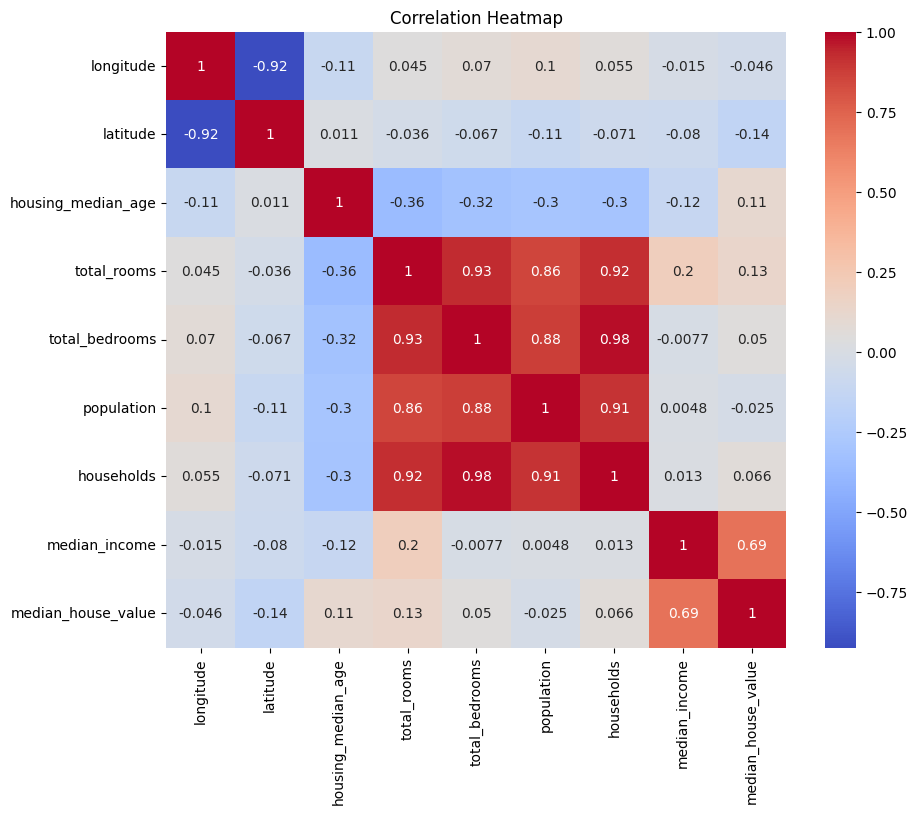

In [ ]:
# (1) Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Drop rows with missing values
df = df.dropna()

# One-hot encode 'ocean_proximity'
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Define features and target
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.648840215443197
MAE: 50413.4333081004
MSE: 4802173538.604191
RMSE: 69297.71669113052


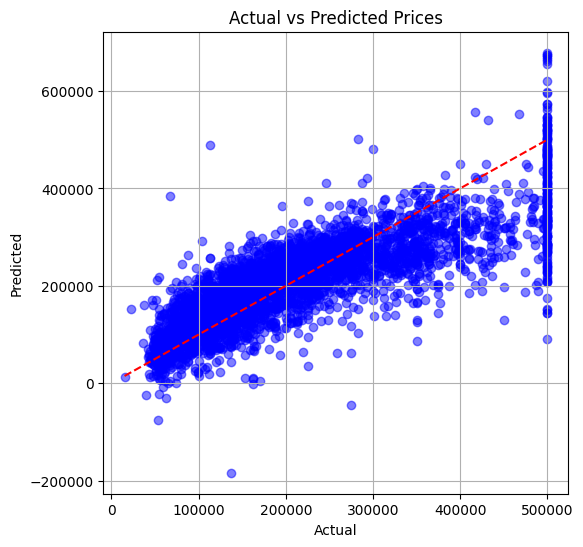

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
# Correlation 
correlations = df_encoded.corr()['median_house_value'].abs().sort_values(ascending=False)
top_features = correlations[1:6].index.tolist()  
print("Top correlated features:", top_features)
#  top features
X_top = df_encoded[top_features]

# Standardize and Improved results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Retrain
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# New metrics
print("\n After Standardization & Feature Selection:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Top correlated features: ['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'latitude', 'ocean_proximity_NEAR OCEAN']

 After Standardization & Feature Selection:
R² Score: 0.5891918929024982
MAE: 54316.74961288815
MSE: 5617875132.932792
RMSE: 74952.4858355798
